In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pandas as pd

### Initial Values

In [2]:
V0 = 200
NV0 = 14760
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 200
Im0 = 0
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

In [3]:
def vary(param,percent):
  return param*((100+percent)/100)

#To be used as follows: 
#1) Put the function in a loop where after every iteration the parameter value is updated, and then the graphs are plotted [To be run twice, once with +ve and the other with -ve percentage]
#2) Choose one parameter at a time, keeping the others constant and then see the relationships with the graphs, and note them down
#3) Finally, we can estimate our region of variation that can be applied to each parameter, by trying to match the existing real-world graphs. 

In [4]:
'''
def dV_dt(b,d,sigma1,sigma1m,zeta):
  return b*V - d*V - sigma1* V * I/N - sigma1m* V * Im/N + zeta*CV

def dNV_dt(b,d,sigma0,sigma0m,zeta):
  return b*NV - d*NV - sigma0* NV * I/N - sigma0m* NV * Im/N + zeta*CNV

def dCV_dt(sigma1,sigma1m,kq,zeta):
  return sigma1* V * I/N + sigma1m* V * Im/N -sigma1* CV -  sigma1m* CV - kq* CV -zeta*CV

def dCNV_dt(sigma0,sigma0m,kq,zeta):
  return sigma0* NV * I/N + sigma0m* NV * Im/N -sigma0* CNV -  sigma0m* CNV - kq* CNV -zeta*CNV

def dIA_dt(sigma1, sigma0 , beta , epsilon):
  return sigma1* CV + sigma0 *CNV - beta* IA - epsilon* IA

def dIAm_dt(sigma1m, sigma0m , betam , epsilonm):
  return sigma1m* CV + sigma0m *CNV - betam* IAm - epsilonm* IAm

def dCQ_dt(kq,sigmaq):
  return kq *(CV + CNV)- sigmaq* CQ 
def dIAQ_dt(epsilon , epsilonm , sigmaq , betaq):
  return epsilon *IA + epsilonm *IAm + sigmaq *CQ - betaq * IAQ

def dI_dt(beta , gamma , eta):
  return beta*IA - gamma*I - eta*I

def dIm_dt(betam , gammam , etam):
  return betam*IAm - gammam*Im - etam*Im

def dH_dt(eta , etam , gammah , betaq ):
  return eta *I+etam *Im -gammah *H + betaq *IAQ

def dR_dt(gamma , gammam , gammah, dR):
  return gamma *I + gammam * Im + gammah* H - dR* R
'''


#Before Equations
'''
def dxdt(compartment, t, *args):
  V ,NV ,CV ,CNV ,CQ ,I ,Im ,H ,R = compartment
  mu , b,d,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR ,N = args
  
  dV_dt = b*V - d*V - sigma1* V * I/N - sigma1m* V * Im/N + zeta*CV - mu*NV + zeta2*CQ
  dNV_dt = b*NV - d*NV - sigma0* NV * I/N - sigma0m* NV * Im/N + zeta*CNV + mu*NV
  dCV_dt = sigma1* V * I/N + sigma1m* V * Im/N -sigma1* CV -  sigma1m* CV - kq* CV -zeta*CV
  dCNV_dt = sigma0* NV * I/N + sigma0m* NV * Im/N -sigma0* CNV -  sigma0m* CNV - kq* CNV -zeta*CNV
  dI_dt = sigma1* CV + sigma0 *CNV - gamma* I - eta* I
  dIm_dt = sigma1m* CV + sigma0m *CNV - gammam* Im - etam* Im
  dCQ_dt = kq *(CV + CNV)- sigmaq* CQ - zeta2*CQ

  dH_dt = eta *I+etam *Im -gammah *H + sigmaq *CQ
  dR_dt = gamma *I + gammam * Im + gammah* H - dR* R
  
  return dV_dt, dNV_dt, dCV_dt, dCNV_dt, dCQ_dt, dI_dt, dIm_dt, dH_dt, dR_dt
'''

'\ndef dxdt(compartment, t, *args):\n  V ,NV ,CV ,CNV ,CQ ,I ,Im ,H ,R = compartment\n  mu , b,d,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR ,N = args\n  \n  dV_dt = b*V - d*V - sigma1* V * I/N - sigma1m* V * Im/N + zeta*CV - mu*NV + zeta2*CQ\n  dNV_dt = b*NV - d*NV - sigma0* NV * I/N - sigma0m* NV * Im/N + zeta*CNV + mu*NV\n  dCV_dt = sigma1* V * I/N + sigma1m* V * Im/N -sigma1* CV -  sigma1m* CV - kq* CV -zeta*CV\n  dCNV_dt = sigma0* NV * I/N + sigma0m* NV * Im/N -sigma0* CNV -  sigma0m* CNV - kq* CNV -zeta*CNV\n  dI_dt = sigma1* CV + sigma0 *CNV - gamma* I - eta* I\n  dIm_dt = sigma1m* CV + sigma0m *CNV - gammam* Im - etam* Im\n  dCQ_dt = kq *(CV + CNV)- sigmaq* CQ - zeta2*CQ\n\n  dH_dt = eta *I+etam *Im -gammah *H + sigmaq *CQ\n  dR_dt = gamma *I + gammam * Im + gammah* H - dR* R\n  \n  return dV_dt, dNV_dt, dCV_dt, dCNV_dt, dCQ_dt, dI_dt, dIm_dt, dH_dt, dR_dt\n'

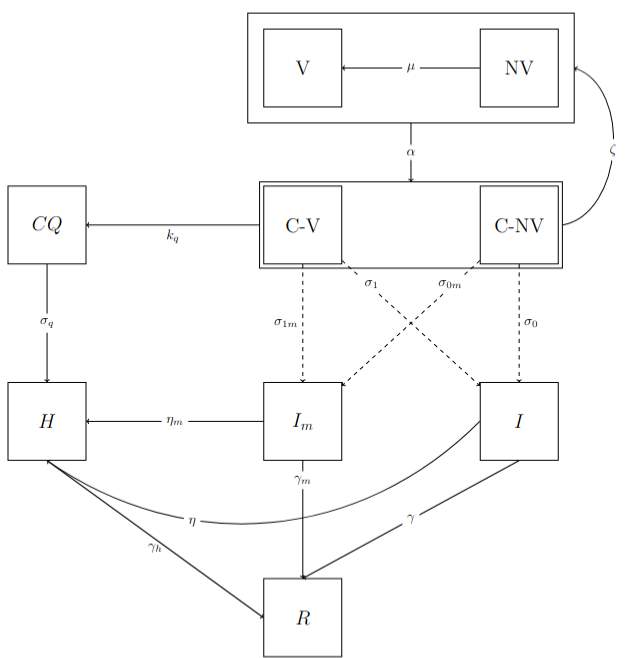

In [5]:
def dxdt(compartment, t, *args):
    V ,NV ,CV ,CNV ,CQ ,I ,Im ,H ,R = compartment
    mu , b,d,alpha, alpham, sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR ,N = args
    
    dV_dt = b*V - d*V - alpha* V * I/N - alpham* V * Im/N + zeta*CV + mu*NV + zeta2*CQ
    dNV_dt = b*NV - d*NV - alpha* NV * I/N - alpham* NV * Im/N + zeta*CNV - mu*NV
    dCV_dt = alpha* V * I/N + alpham* V * Im/N -sigma1* CV -  sigma1m* CV - kq* CV -zeta*CV
    dCNV_dt = alpha* NV * I/N + alpham* NV * Im/N -sigma0* CNV -  sigma0m* CNV - kq* CNV -zeta*CNV
    dI_dt = sigma1* CV + sigma0 *CNV - gamma* I - eta* I
    dIm_dt = sigma1m* CV + sigma0m *CNV - gammam* Im - etam* Im
    dCQ_dt = kq * (CV + CNV) - sigmaq* CQ - zeta2*CQ

    dH_dt = eta *I+etam *Im -gammah *H + sigmaq *CQ
    dR_dt = gamma *I + gammam * Im + gammah* H - dR* R
    
    return dV_dt, dNV_dt, dCV_dt, dCNV_dt, dCQ_dt, dI_dt, dIm_dt, dH_dt, dR_dt

In [6]:

V0 = 200
NV0 = 14760
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 200
Im0 = 0
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])
mu,b,d,alpha,alpham ,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR = np.zeros(19)


alpha = 0.3
alpham = alpha


fra = 0.9
zeta= 0.01
zeta2 = 0.0
sigma0= 0.4
gamma= 0.08
mu = 0.1
sigma0m=0.5
sigmaq=0.02
gammah=0.8
gammam=0.04
sigma1=0.02
sigma1m=0.04
eta=0.4
etam=0.5
kq=0.6


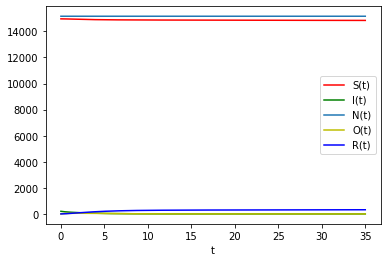

In [7]:
t = np.linspace(0, 35, 20000)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol = odeint(dxdt, x0, t, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))


plt.plot(t, sol[:, 0]+sol[:,1]+sol[:,2]+sol[:,3]+sol[:,4], 'r', label='S(t)')
plt.plot(t, sol[:,5]+sol[:, 6], 'g', label='I(t)')
plt.plot(t,sol[:, 0]+sol[:,1]+ sol[:,2]+sol[:,3]+sol[:,4]+sol[:,7]+sol[:,5]+sol[:, 6]+sol[:,8],label='N(t)')
plt.plot(t, sol[:,7],'y',label='O(t)')
plt.plot(t, sol[:, -1], 'b', label='R(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

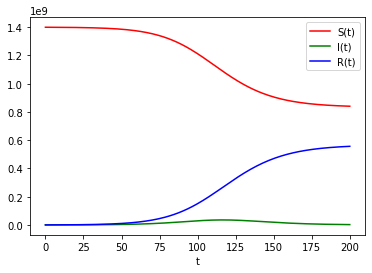

In [167]:
t = np.linspace(0, 200, 200)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol = odeint(dxdt, x0, t, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N))

plt.plot(t, sol[:, 0]+sol[:,1], 'r', label='S(t)')
plt.plot(t, sol[:, 5]+sol[:, 6], 'g', label='I(t)')
plt.plot(t, sol[:, -1], 'b', label='R(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

In [168]:
'''
fra = 0.9
zeta= 0.0
zeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days
sigma0= 0.1785
gamma= 0.05
mu = 0.005
sigma0m=0.1785
sigmaq=0.142857*(1-fra) #multiply with 1-fraction of ppl not going hopital after 7days
gammah=0.04
gammam=0.0333
sigma1=0.1785
sigma1m=0.1785
eta=0.001
etam=0.002
kq=0.25

'''

'\nfra = 0.9\nzeta= 0.0\nzeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days\nsigma0= 0.1785\ngamma= 0.05\nmu = 0.005\nsigma0m=0.1785\nsigmaq=0.142857*(1-fra) #multiply with 1-fraction of ppl not going hopital after 7days\ngammah=0.04\ngammam=0.0333\nsigma1=0.1785\nsigma1m=0.1785\neta=0.001\netam=0.002\nkq=0.25\n\n'

In [169]:
"""
mu,b,d,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR   = np.zeros(17)

fra = 0.9
zeta= 0.0
zeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days
sigma0= 0.1785
gamma= 0.05/2
mu = 0.005
sigma0m=0.1785
sigmaq=0.142857*(1-fra) #multiply with 1-fraction of ppl not going hopital after 7days
gammah=0.04/2
gammam=0.0333/2
sigma1=0.1785
sigma1m=0.1785
eta=0.001
etam=0.002
kq=0.25

"""

'\nmu,b,d,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR   = np.zeros(17)\n\nfra = 0.9\nzeta= 0.0\nzeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days\nsigma0= 0.1785\ngamma= 0.05/2\nmu = 0.005\nsigma0m=0.1785\nsigmaq=0.142857*(1-fra) #multiply with 1-fraction of ppl not going hopital after 7days\ngammah=0.04/2\ngammam=0.0333/2\nsigma1=0.1785\nsigma1m=0.1785\neta=0.001\netam=0.002\nkq=0.25\n\n'

In [170]:
V0 = 200
NV0 = 14760
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 200
Im0 = 0
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])
mu,b,d,alpha,alpham ,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR = np.zeros(19)

fra = 0.9
zeta= 0.0
zeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days
sigma0= 0.1785
gamma= 0.05/2
mu = 0.005
sigma0m=0.1785
sigmaq=0.142857*(1-fra) #multiply with 1-fraction of ppl not going hopital after 7days
gammah=0.04/2
gammam=0.0333/2
sigma1=0.1785
sigma1m=0.1785
eta=0.001
etam=0.002
kq=0.25


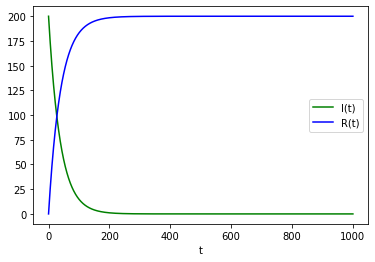

In [12]:
t = np.linspace(0, 1000, 2000)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol = odeint(dxdt, x0, t, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

#plt.plot(t, sol[:, 0]+sol[:, 1], 'r', label='S(t)')
plt.plot(t, sol[:, 5] + sol[:, 6], 'g', label='I(t)')
plt.plot(t, sol[:, -1], 'b', label='R(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

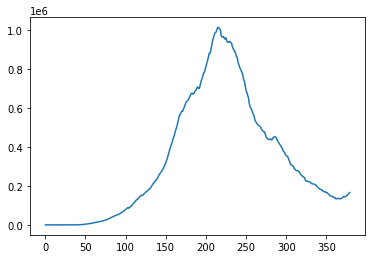

In [172]:
Worldometer_data = pd.read_csv('worldometer.csv')

world_data = Worldometer_data['active case']
first_wave = world_data[:380]

plt.plot(first_wave)

In [361]:
#Initial Conditions
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 1000
Im0 = 1000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.35
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.25
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.2
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01  * 2.9
etam = 0.02 * 2.9

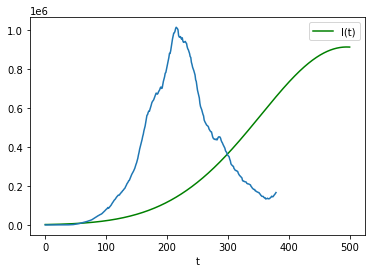

In [364]:
t = np.linspace(0, 500, 1000)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol = odeint(dxdt, x0, t, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))


# plt.plot(t, sol[:, 0] + sol[:, 1], 'r', label='S(t)')
plt.plot(t, sol[:, 5] + sol[:, 6], 'g', label='I(t)')
# plt.plot(t, sol[:,-1], 'b', label='R(t)')
plt.plot(first_wave)
plt.legend(loc='best')
plt.xlabel('t')
plt.show()

In [257]:
#Final for first wave
#Initial Conditions
'''
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 20000
Im0 = 20000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.3
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.15
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.15
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01
etam = 0.02
'''


#Other final
'''#Initial Conditions
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 1000
Im0 = 1000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.35
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.25
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.2
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01  * 2.9
etam = 0.02 * 2.9
'''

'\nV0 = 2000\nNV0 = 1.4 * 10**9\nCV0 = 0\nCNV0 = 0\nCQ0 = 0\nI0 = 20000\nIm0 = 20000\nH0 = 0\nR0 = 0\nN = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])\n\n#Parameters\nmu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)\n\nalpha = 0.3\nalpham = 0.4\n\nfra = 0.9 #fraction of ppl not going hopital after 7days\nzeta = 0.9\nzeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days\nkq = 0.3\n\nmu = 0.005\n\ni = 0.15\nsigma0 = 0.25    * 1   * 1.25/i\nsigma0m = 0.25   * 1.5 * 1.25/i\nsigma1 = 0.1785  * 1   * 1.25/i\nsigma1m = 0.1785 * 1.5 * 1.25/i\nsigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days\n\n\nj = 0.15\ngamma = 0.05    /j\ngammah = 0.04   /j\ngammam = 0.0333 /j\n\neta = 0.01\netam = 0.02\n'

#Closest I can get
'''
#Initial Conditions
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 200
Im0 = 200
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.35
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.09
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.1315
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01
etam = 0.02
'''

In [17]:
'''
#Initial Conditions
V0 = 200
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 200
Im0 = 200
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR   = np.zeros(17)

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta= 0.1
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days

mu = 0.005

sigma0= 0.1785
sigma0m=0.1785 * 2
sigmaq=0.142857 * (1-fra) #multiply with 1-fraction of ppl not going hopital after 7days
sigma1=0.1785
sigma1m=0.1785 * 2

gamma=0.05/5
gammah=0.04/5
gammam=0.0333/5

eta=0.001
etam=0.002
kq=0.4'''

'\n#Initial Conditions\nV0 = 200\nNV0 = 1.4 * 10**9\nCV0 = 0\nCNV0 = 0\nCQ0 = 0\nI0 = 200\nIm0 = 200\nH0 = 0\nR0 = 0\nN = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])\n\n#Parameters\nmu, b, d, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR   = np.zeros(17)\n\nfra = 0.9 #fraction of ppl not going hopital after 7days\nzeta= 0.1\nzeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days\n\nmu = 0.005\n\nsigma0= 0.1785\nsigma0m=0.1785 * 2\nsigmaq=0.142857 * (1-fra) #multiply with 1-fraction of ppl not going hopital after 7days\nsigma1=0.1785\nsigma1m=0.1785 * 2\n\ngamma=0.05/5\ngammah=0.04/5\ngammam=0.0333/5\n\neta=0.001\netam=0.002\nkq=0.4'

In [18]:
#Value for many waves
'''
#Initial Conditions
V0 = 200
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 200
Im0 = 200
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu,b,d,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR   = np.zeros(17)

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta= 4.5
zeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days

mu = 0.005

sigma0= 0.1785 * 2
sigma0m=0.1785 * 2
sigmaq=0.142857 * (1-fra) #multiply with 1-fraction of ppl not going hopital after 7days
sigma1=0.1785
sigma1m=0.1785 * 2

gamma=0.05/2
gammah=0.04/2
gammam=0.0333/2

eta=0.01 
etam=0.02
kq=0.4
'''

'\n#Initial Conditions\nV0 = 200\nNV0 = 1.4 * 10**9\nCV0 = 0\nCNV0 = 0\nCQ0 = 0\nI0 = 200\nIm0 = 200\nH0 = 0\nR0 = 0\nN = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])\n\n#Parameters\nmu,b,d,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma, zeta2, dR   = np.zeros(17)\n\nfra = 0.9 #fraction of ppl not going hopital after 7days\nzeta= 4.5\nzeta2 = 0.142857*fra #multiply with fraction of ppl not going hopital after 7days\n\nmu = 0.005\n\nsigma0= 0.1785 * 2\nsigma0m=0.1785 * 2\nsigmaq=0.142857 * (1-fra) #multiply with 1-fraction of ppl not going hopital after 7days\nsigma1=0.1785\nsigma1m=0.1785 * 2\n\ngamma=0.05/2\ngammah=0.04/2\ngammam=0.0333/2\n\neta=0.01 \netam=0.02\nkq=0.4\n'

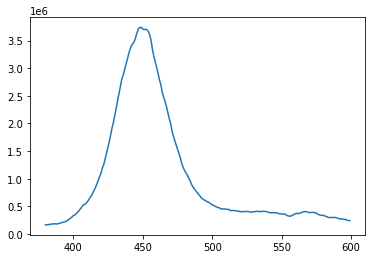

In [365]:
second_wave = world_data[380:600]

plt.plot(second_wave)

In [366]:
#Initial Conditions
v = 0.1 #percentage vaccinated
V0 = 1.4 * 10**9 * v
NV0 = 1.4 * 10**9 * (1 - v)
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 85000
Im0 = 80000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.3
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.3
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.2
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01  * 1
etam = 0.02 * 1


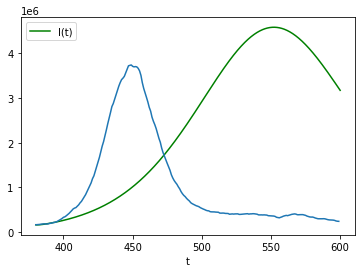

In [371]:
t = np.linspace(380, 600, 1000)
x0 = V0 ,NV0 ,CV0 ,CNV0 , CQ0 ,I0 ,Im0 ,H0 ,R0
sol = odeint(dxdt, x0, t, args=(mu,b,d,alpha, alpham,sigma1,sigma1m,zeta,sigma0,sigma0m,kq,sigmaq ,eta , etam , gammah ,gammam , gamma,zeta2, dR,N ))

# plt.plot(t, sol[:, 0] + sol[:, 1], 'r', label='S(t)')
plt.plot(t, sol[:, 5] + sol[:, 6], 'g', label='I(t)')
# plt.plot(t, sol[:,-1], 'b', label='R(t)')
plt.plot(second_wave)
plt.legend(loc='best')
plt.xlabel('t')
# plt.yscale('log')
# plt.xscale('log')
plt.show()


In [369]:
#Initial Conditions
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 85000
Im0 = 80000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.3
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.04
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.138
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01  * 2
etam = 0.02 * 2



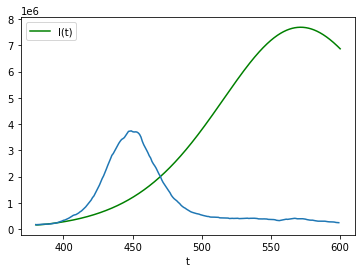

In [370]:
# plt.plot(t, sol[:, 0] + sol[:, 1], 'r', label='S(t)')
plt.plot(t, sol[:, 5] + sol[:, 6], 'g', label='I(t)')
# plt.plot(t, sol[:,-1], 'b', label='R(t)')
plt.plot(second_wave)
plt.legend(loc='best')
plt.xlabel('t')
# plt.yscale('log')
# plt.xscale('log')
plt.show()

In [315]:
#Final for second wave
'''
#Initial Conditions
V0 = 2000
NV0 = 1.4 * 10**9
CV0 = 0
CNV0 = 0
CQ0 = 0
I0 = 85000
Im0 = 80000
H0 = 0
R0 = 0
N = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])

#Parameters
mu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)

alpha = 0.3
alpham = 0.4

fra = 0.9 #fraction of ppl not going hopital after 7days
zeta = 0.9
zeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days
kq = 0.3

mu = 0.005

i = 0.04
sigma0 = 0.25    * 1   * 1.25/i
sigma0m = 0.25   * 1.5 * 1.25/i
sigma1 = 0.1785  * 1   * 1.25/i
sigma1m = 0.1785 * 1.5 * 1.25/i
sigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days


j = 0.138
gamma = 0.05    /j
gammah = 0.04   /j
gammam = 0.0333 /j

eta = 0.01  * 2
etam = 0.02 * 2
'''

'\n#Initial Conditions\nV0 = 2000\nNV0 = 1.4 * 10**9\nCV0 = 0\nCNV0 = 0\nCQ0 = 0\nI0 = 85000\nIm0 = 80000\nH0 = 0\nR0 = 0\nN = sum([V0 ,NV0 ,CV0 ,CNV0  ,CQ0 ,I0 ,Im0 ,H0 ,R0])\n\n#Parameters\nmu, b, d, alpha, alpham, sigma1, sigma1m, zeta, sigma0, sigma0m, kq, sigmaq, eta, etam, gammah, gammam, gamma, zeta2, dR = np.zeros(19)\n\nalpha = 0.3\nalpham = 0.4\n\nfra = 0.9 #fraction of ppl not going hopital after 7days\nzeta = 0.9\nzeta2 = 0.142857 * fra #multiply with fraction of ppl not going hopital after 7days\nkq = 0.3\n\nmu = 0.005\n\ni = 0.04\nsigma0 = 0.25    * 1   * 1.25/i\nsigma0m = 0.25   * 1.5 * 1.25/i\nsigma1 = 0.1785  * 1   * 1.25/i\nsigma1m = 0.1785 * 1.5 * 1.25/i\nsigmaq = 0.142857 * (1 - fra) #multiply with 1-fraction of ppl not going hopital after 7days\n\n\nj = 0.138\ngamma = 0.05    /j\ngammah = 0.04   /j\ngammam = 0.0333 /j\n\neta = 0.01  * 2\netam = 0.02 * 2\n'